<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-for-Modeling" data-toc-modified-id="Preparing-for-Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing for Modeling</a></span><ul class="toc-item"><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Train/Test Split</a></span></li><li><span><a href="#Scale-three-Numeric-Features" data-toc-modified-id="Scale-three-Numeric-Features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scale three Numeric Features</a></span></li><li><span><a href="#Define-Functions-for-Modeling" data-toc-modified-id="Define-Functions-for-Modeling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Define Functions for Modeling</a></span><ul class="toc-item"><li><span><a href="#Model-Fit-and-Evaluation-Functions" data-toc-modified-id="Model-Fit-and-Evaluation-Functions-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Model Fit and Evaluation Functions</a></span></li><li><span><a href="#Feature-Coefficient" data-toc-modified-id="Feature-Coefficient-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Feature Coefficient</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Random-Search" data-toc-modified-id="Random-Search-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Random Search</a></span></li></ul></li></ul></li><li><span><a href="#Model-Selection,-Tuning-and-Training" data-toc-modified-id="Model-Selection,-Tuning-and-Training-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Selection, Tuning and Training</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model:-Logistic-Regression" data-toc-modified-id="Baseline-Model:-Logistic-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Baseline Model: Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Fit-and-Evaluate-Logistic-Regression-with-Default-Hyper-parameters" data-toc-modified-id="Fit-and-Evaluate-Logistic-Regression-with-Default-Hyper-parameters-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Fit and Evaluate Logistic Regression with Default Hyper-parameters</a></span></li><li><span><a href="#Comparing-the-Cross-Validation-roc_auc-Scores-with-Different-C-parameter" data-toc-modified-id="Comparing-the-Cross-Validation-roc_auc-Scores-with-Different-C-parameter-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Comparing the Cross Validation roc_auc Scores with Different C parameter</a></span></li><li><span><a href="#Optimized-Logistic-Regression-Training-and-Evaluation" data-toc-modified-id="Optimized-Logistic-Regression-Training-and-Evaluation-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Optimized Logistic Regression Training and Evaluation</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>K-Nearest Neighbors</a></span><ul class="toc-item"><li><span><a href="#Fit-and-Evaluate-KNN-with-Default-Hyper-parameters" data-toc-modified-id="Fit-and-Evaluate-KNN-with-Default-Hyper-parameters-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Fit and Evaluate KNN with Default Hyper-parameters</a></span></li><li><span><a href="#Comparing-the-roc_auc-Scores-with-Different-Number-of-Neighbors" data-toc-modified-id="Comparing-the-roc_auc-Scores-with-Different-Number-of-Neighbors-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Comparing the roc_auc Scores with Different Number of Neighbors</a></span></li><li><span><a href="#KNN-Hyper-parameters-Tuning-with-GridSearch" data-toc-modified-id="KNN-Hyper-parameters-Tuning-with-GridSearch-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>KNN Hyper-parameters Tuning with GridSearch</a></span></li><li><span><a href="#Optimized-KNN-training-and-evaluation" data-toc-modified-id="Optimized-KNN-training-and-evaluation-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Optimized KNN training and evaluation</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Fit-and-Evaluate-Random-Forest-with-Default-Hyper-parameters" data-toc-modified-id="Fit-and-Evaluate-Random-Forest-with-Default-Hyper-parameters-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Fit and Evaluate Random Forest with Default Hyper-parameters</a></span></li><li><span><a href="#Random-Forest-Hyper-parameters-Tuning" data-toc-modified-id="Random-Forest-Hyper-parameters-Tuning-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Random Forest Hyper-parameters Tuning</a></span><ul class="toc-item"><li><span><a href="#Step1:-Random-Search" data-toc-modified-id="Step1:-Random-Search-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Step1: Random Search</a></span></li><li><span><a href="#Step2:-Grid-Search" data-toc-modified-id="Step2:-Grid-Search-2.3.2.2"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Step2: Grid Search</a></span></li></ul></li><li><span><a href="#Optimized-Random-Forest-Training-and-Evaluation" data-toc-modified-id="Optimized-Random-Forest-Training-and-Evaluation-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Optimized Random Forest Training and Evaluation</a></span></li></ul></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Fit-and-Evaluate-Gradient-Boosting-with-Default-Hyper-parameters¶" data-toc-modified-id="Fit-and-Evaluate-Gradient-Boosting-with-Default-Hyper-parameters¶-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Fit and Evaluate Gradient Boosting with Default Hyper-parameters¶</a></span></li><li><span><a href="#Gradient-Boosting-Hyper-parameters-Tuning-with-Random-Search" data-toc-modified-id="Gradient-Boosting-Hyper-parameters-Tuning-with-Random-Search-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Gradient Boosting Hyper-parameters Tuning with Random Search</a></span></li><li><span><a href="#Optimized-Gradient-Boosting-Training-and-Evaluation" data-toc-modified-id="Optimized-Gradient-Boosting-Training-and-Evaluation-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Optimized Gradient Boosting Training and Evaluation</a></span></li></ul></li></ul></li><li><span><a href="#Comparing-Models" data-toc-modified-id="Comparing-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparing Models</a></span><ul class="toc-item"><li><span><a href="#Comparing-roc_auc-Scores" data-toc-modified-id="Comparing-roc_auc-Scores-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Comparing roc_auc Scores</a></span></li><li><span><a href="#Comparing-Accuracy,-TPR,-FPR" data-toc-modified-id="Comparing-Accuracy,-TPR,-FPR-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Comparing Accuracy, TPR, FPR</a></span></li></ul></li><li><span><a href="#Save-Optimized-Models" data-toc-modified-id="Save-Optimized-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save Optimized Models</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Future-work" data-toc-modified-id="Future-work-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Future work</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
pd.options.mode.chained_assignment = None
sns.set()

## Preparing for Modeling

### Import Data 

In [2]:
loans_impo_6 = pd.read_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/ProcessedData/loans_impo_6.cvs')

In [3]:
loans_impo_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612393 entries, 0 to 612392
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amount              612393 non-null  float64
 1   term_in_months           612393 non-null  float64
 2   MPI                      612393 non-null  float64
 3   With_tag                 612393 non-null  int64  
 4   posted_season_Summer     612393 non-null  int64  
 5   borrower_genders_female  612393 non-null  int64  
 6   funding_speed            612393 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 32.7 MB


In [4]:
loans_impo_6.head()

,loan_amount,term_in_months,MPI,With_tag,posted_season_Summer,borrower_genders_female,funding_speed
0,300.0,12.0,0.230320,0,0,1,1.0
1,575.0,11.0,0.230320,0,0,1,1.0
2,150.0,43.0,0.191099,1,0,1,1.0
3,200.0,11.0,0.230320,0,0,1,1.0
4,400.0,14.0,0.230320,0,0,1,1.0


### Train/Test Split 

In [5]:
X = loans_impo_6.drop(columns='funding_speed')
y = loans_impo_6.funding_speed

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale three Numeric Features

In [7]:
# Scale three numeric features
numeric_columns = ['loan_amount', 'term_in_months', 'MPI']

scaler = StandardScaler() 
X_train.loc[:, numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test.loc[:, numeric_columns] = scaler.transform(X_test[numeric_columns])

X_train.describe()

,loan_amount,term_in_months,MPI,With_tag,posted_season_Summer,borrower_genders_female
count,4.286750e+05,4.286750e+05,4.286750e+05,428675.000000,428675.000000,428675.000000
mean,3.694205e-16,1.597190e-15,1.073775e-16,0.739299,0.222152,0.724274
std,1.000001e+00,1.000001e+00,1.000001e+00,0.439018,0.415693,0.446880
min,-6.857225e-01,-1.465078e+00,-1.063231e+00,0.000000,0.000000,0.000000
25%,-4.757291e-01,-6.496076e-01,-6.230229e-01,0.000000,0.000000,0.000000
50%,-2.657356e-01,-6.712879e-02,-6.081367e-01,1.000000,0.000000,1.000000
75%,1.309188e-01,4.936697e-02,5.453715e-01,1.000000,0.000000,1.000000
max,9.262138e+01,1.682476e+01,3.740651e+00,1.000000,1.000000,1.000000


### Define Functions for Modeling

#### Model Fit and Evaluation Functions

In [8]:
def model_fit_evaluate(clf):
    #Fit the classifier on the data
    clf.fit(X_train, y_train)
    
    #Predict
    predictions = clf.predict(X_test)
    
    # Calculate the cross validation roc_auc score
    # Train set
    cv_score_tr= cross_val_score(clf,X_train,y_train,cv=5,scoring='roc_auc')
    print('CV ROC-AUC Score(Train): Mean - {:5f} | Std - {:5f} | Max - {:5f} | Min - {:5f}'.format(
        np.mean(cv_score_tr),np.std(cv_score_tr),np.max(cv_score_tr),np.min(cv_score_tr)))
    # Test set
    cv_score_te= cross_val_score(clf,X_test,y_test,cv=5,scoring='roc_auc')
    print('CV ROC-AUC Score(Test): Mean - {:5f} | Std - {:5f} | Max - {:5f} | Min - {:5f}'.format(
        np.mean(cv_score_te),np.std(cv_score_te),np.max(cv_score_te),np.min(cv_score_te)))
    
    # Calcute true positive rate and false positive rate on test set
    tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).reshape(-1)
    TPR = (tp / (tp + fn)).round(3)
    FPR = (fp / (fp + tn)).round(3)
    print('True Positive Rate:', TPR)
    print('False Positive Rate:', FPR)    
    
    # Calculate accuary score on test set
    accu_score = accuracy_score(y_test, predictions)
    print('Mean Accuracy Score:', accu_score.round(3))
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'r', linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC Curve',fontsize=15)
    plt.xlim(-0.05,1)
    plt.ylim(0,1.05)
    plt.show()
    
    return cv_score_tr.mean().round(3), cv_score_te.mean().round(3), accu_score.round(3), TPR, FPR

#### Feature Coefficient

In [9]:
def feature_coef(clf):
    # Check and plot feature coefficient
    coefficients = clf.coef_
    ordered_feature_coef = pd.Series(coefficients[0], index=X_train.columns).abs().sort_values(ascending=False)   
    ordered_feature_coef.sort_values().plot.barh()
    plt.xlabel('Coefficient',fontsize=15)
    plt.ylabel('Features',fontsize=15)
    plt.title('Feature Coefficient',fontsize=15)
    print('Feature Coefficient:')
    print(ordered_feature_coef)
    plt.show()    

#### Grid Search

In [11]:
def grid_search(estimator, hyper_para):
    # Tuning hyper-parameters with Grid Search
    grid = GridSearchCV(estimator, param_grid=hyper_para, scoring='roc_auc', n_jobs=-1, cv=5, verbose=2)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    best_score = grid.best_score_
    best_estimator = grid.best_estimator_
    print('Best Parameters:', best_params)
    print('Best roc_auc Score:', round(best_score, 3))
    print('Best Estimator:', best_estimator)

#### Random Search

In [12]:
def random_search(estimator, hyper_para, number_of_iter, number_of_folds):
    # Tuning hyper-parameters with Random Search
    random = RandomizedSearchCV(estimator, param_distributions=hyper_para, scoring='roc_auc', n_jobs =-1,
                                n_iter=number_of_iter, cv = number_of_folds, random_state=42,  verbose=2)
    random.fit(X_train, y_train)
    best_params = random.best_params_
    best_score = random.best_score_
    best_estimator = random.best_estimator_
    print('Best Parameters:', best_params)
    print('Best roc_auc Score:', round(best_score, 3))
    print('Best Estimator:', best_estimator)

## Model Selection, Tuning and Training

### Baseline Model: Logistic Regression

#### Fit and Evaluate Logistic Regression with Default Hyper-parameters

CV ROC-AUC Score(Train): Mean - 0.750122 | Std - 0.001805 | Max - 0.752201 | Min - 0.747103
CV ROC-AUC Score(Test): Mean - 0.750554 | Std - 0.001687 | Max - 0.752719 | Min - 0.747709
True Positive Rate: 0.619
False Positive Rate: 0.256
Mean Accuracy Score: 0.682


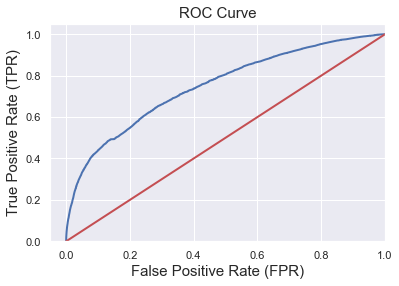

In [13]:
# Initial the model with default hyper-parameters
# Use a large max_iter to aviod warning
lr_default = LogisticRegression(random_state=42)
# Fit and evaluate the defult model 
_ = model_fit_evaluate(lr_default)

#### Comparing the Cross Validation roc_auc Scores with Different C parameter

In [14]:
C_param_range = [0.001,0.01,0.1,1,10,100]
lr_C_roc_auc = pd.DataFrame(columns = ['C_parameter','train_roc_auc', 'test_roc_auc'])
lr_C_roc_auc['C_parameter'] = C_param_range

index = 0
for i in C_param_range:
    lr = LogisticRegression(C = i, random_state=42) 
    lr_roc_auc_tr = cross_val_score(lr,X_train,y_train,cv=5,scoring='roc_auc')
    lr_roc_auc_te = cross_val_score(lr,X_test,y_test,cv=5,scoring='roc_auc')
    lr_C_roc_auc.iloc[index, 1] = lr_roc_auc_tr.mean()
    lr_C_roc_auc.iloc[index, 2] = lr_roc_auc_te.mean()
    index += 1
    
lr_C_roc_auc

,C_parameter,train_roc_auc,test_roc_auc
0,0.001,0.750047,0.750499
1,0.010,0.750122,0.750533
2,0.100,0.75012,0.750556
3,1.000,0.750122,0.750554
4,10.000,0.750122,0.750553
5,100.000,0.750122,0.750553


There are very small differences among the roc_auc scores. The roc_auc score of the test set, when setting C value as 0.1, is little bit higher than the others. So we'll initial logistic regression with C value equaling 0.1. 

#### Optimized Logistic Regression Training and Evaluation

CV ROC-AUC Score(Train): Mean - 0.750120 | Std - 0.001804 | Max - 0.752198 | Min - 0.747102
CV ROC-AUC Score(Test): Mean - 0.750556 | Std - 0.001689 | Max - 0.752718 | Min - 0.747702
True Positive Rate: 0.619
False Positive Rate: 0.256
Mean Accuracy Score: 0.682


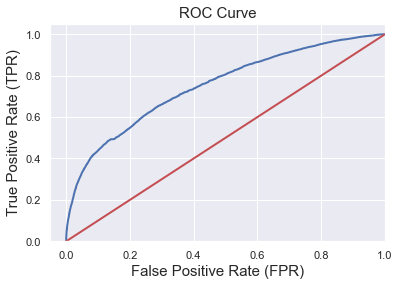

In [15]:
# Initial the model with optimized hyper-parameter
lr_opti = LogisticRegression(C=0.1, random_state=42)

# Fit and evaluate the optimized model
lr_roc_auc_tr, lr_roc_auc_te, lr_accu, lr_tpr, lr_fpr = model_fit_evaluate(lr_opti)

As we expected, there is no improvement to the rounded scores when we tried to optimize the performance of the Logistic Regression Model.

Feature Coefficient:
loan_amount                1.817153
With_tag                   1.124273
posted_season_Summer       0.691992
borrower_genders_female    0.659936
term_in_months             0.141806
MPI                        0.051021
dtype: float64


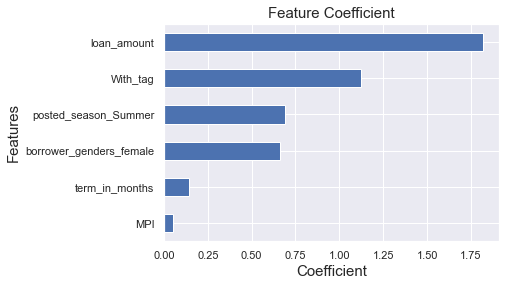

In [16]:
# Calculate feature coefficient
feature_coef(lr_opti)

### K-Nearest Neighbors

#### Fit and Evaluate KNN with Default Hyper-parameters

CV ROC-AUC Score(Train): Mean - 0.799890 | Std - 0.002660 | Max - 0.804282 | Min - 0.797326
CV ROC-AUC Score(Test): Mean - 0.797276 | Std - 0.003996 | Max - 0.801412 | Min - 0.791951
True Positive Rate: 0.711
False Positive Rate: 0.232
Mean Accuracy Score: 0.74


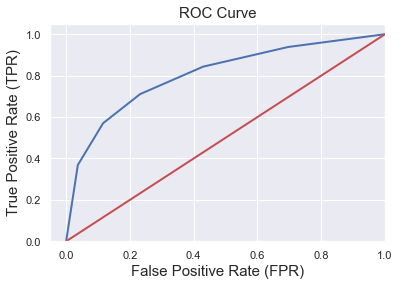

In [17]:
# Initial the model with default hyper-parameters
knn_default = KNeighborsClassifier(n_jobs=-1)
# Fit and evaluate the default model 
_ = model_fit_evaluate(knn_default)

#### Comparing the roc_auc Scores with Different Number of Neighbors

                     train_roc_auc_score  test_roc_auc_score
number_of_neighbors                                         
1.0                             0.695520            0.687255
3.0                             0.776013            0.772417
5.0                             0.800344            0.793860
7.0                             0.811387            0.805127
9.0                             0.817511            0.812302
11.0                            0.821162            0.816530
13.0                            0.824276            0.819427
15.0                            0.825954            0.821393
17.0                            0.827216            0.822444
19.0                            0.828593            0.823571
21.0                            0.829615            0.824124
23.0                            0.830022            0.824772
25.0                            0.830482            0.824997
27.0                            0.831045            0.825126
29.0                    

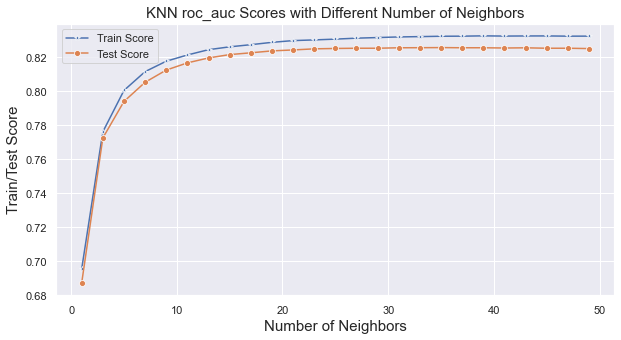

In [18]:
scores_tr = []
scores_te = []

# Calculate the train and test sets cross validation roc_auc scores with different number of neighbors
for i in range(1,50, 2):
    knn = KNeighborsClassifier(i, n_jobs=-1)
    knn.fit(X_train, y_train)
    tr_mean = cross_val_score(knn,X_train,y_train,cv=3,scoring='roc_auc').mean()
    te_mean = cross_val_score(knn,X_test,y_test,cv=3,scoring='roc_auc').mean()
    scores_tr.append(tr_mean)
    scores_te.append(te_mean)

# Build a dataframe to store the result
scores_neighbors = pd.DataFrame({'number_of_neighbors': np.linspace(1,49,25), 
                                'train_roc_auc_score': scores_tr, 
                                'test_roc_auc_score': scores_te})
print(scores_neighbors.set_index('number_of_neighbors'))

# Display the result 
plt.figure(figsize=(10,5))
n_neighbors = range(1,50, 2)
sns.lineplot(x=n_neighbors,y=scores_tr,marker='*',label='Train Score')
sns.lineplot(x=n_neighbors,y=scores_te,marker='o',label='Test Score')
plt.xlabel('Number of Neighbors',fontsize=15)
plt.ylabel('Train/Test Score',fontsize=15)
plt.title('KNN roc_auc Scores with Different Number of Neighbors',fontsize=15)
_ = plt.show()

There is an elbow-point at around 10 neighbors; the highest score is at 35 neighbors.

#### KNN Hyper-parameters Tuning with GridSearch

We will use grid search to optimize the KNN model.

In [19]:
# Define estimator
knn = KNeighborsClassifier(n_jobs=-1)

# Define hyper-parameters range
# Number of neighbors
n_neighbors = list(range(10, 45, 2))
# The way to weight points
weights = ["distance", "uniform"]
# Power parameter for the Minkowski metric. 
# When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
p = [1,2]

knn_para = {'n_neighbors': n_neighbors,
            'weights': weights,
            'p': p}

print('Hyper-parameters Range:\n', knn_para)

# Optimize hyper-parameters with Grid Search 
grid_search(knn, knn_para)

Hyper-parameters Range:
 {'n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44], 'weights': ['distance', 'uniform'], 'p': [1, 2]}
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'n_neighbors': 44, 'p': 1, 'weights': 'uniform'}
Best roc_auc Score: 0.835
Best Estimator: KNeighborsClassifier(n_jobs=-1, n_neighbors=44, p=1)


We will do further grid search by extending the number of the neighbors to 70 since 44 is at the edge of the range. To simplify, we will set weights as uniform by default.

In [22]:
knn_para_1 = {'n_neighbors': list(range(46, 71, 2)),
              'p': p}

print('Hyper-parameters Range:\n', knn_para_1)

# Optimize hyper-parameters with Grid Search 
grid_search(knn, knn_para_1)

Hyper-parameters Range:
 {'n_neighbors': [46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70], 'p': [1, 2]}
Fitting 5 folds for each of 26 candidates, totalling 130 fits
Best Parameters: {'n_neighbors': 48, 'p': 1}
Best roc_auc Score: 0.835
Best Estimator: KNeighborsClassifier(n_jobs=-1, n_neighbors=48, p=1)


The second trial showed that the best number of neighbors is 48 with same score of 44 neighbors.

#### Optimized KNN training and evaluation

CV ROC-AUC Score(Train): Mean - 0.834974 | Std - 0.001878 | Max - 0.836862 | Min - 0.831660
CV ROC-AUC Score(Test): Mean - 0.828347 | Std - 0.001990 | Max - 0.830929 | Min - 0.825468
True Positive Rate: 0.7
False Positive Rate: 0.185
Mean Accuracy Score: 0.757


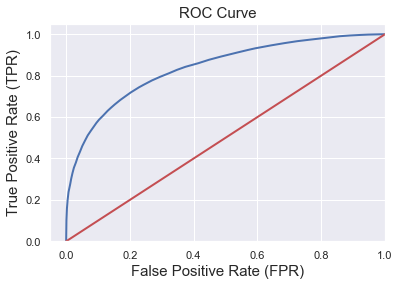

In [23]:
# Initial the model with optimized hyper-parameter
knn_opti = KNeighborsClassifier(n_jobs=-1, n_neighbors=48, p=1)

# Fit and evaluate the optimized model
knn_roc_auc_tr, knn_roc_auc_te, knn_accu, knn_tpr, knn_fpr = model_fit_evaluate(knn_opti)

### Random Forest

#### Fit and Evaluate Random Forest with Default Hyper-parameters

CV ROC-AUC Score(Train): Mean - 0.750122 | Std - 0.001805 | Max - 0.752201 | Min - 0.747103
CV ROC-AUC Score(Test): Mean - 0.750554 | Std - 0.001687 | Max - 0.752719 | Min - 0.747709
True Positive Rate: 0.619
False Positive Rate: 0.256
Mean Accuracy Score: 0.682


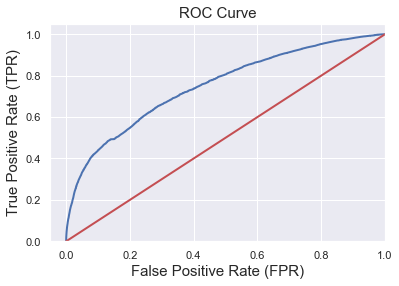

In [24]:
# Initial the model with default hyper-parameters
rf_default = RandomForestClassifier(random_state=42, n_jobs=-1)

# Fit and evaluate the defult model 
_ = model_fit_evaluate(rf_default)

#### Random Forest Hyper-parameters Tuning

For Random Forest model, firstly, we will figure out the hyper-parameters range based on Random Search, and then optimize the model using Grid Search.

##### Step1: Random Search

In [25]:
# Define estimator
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define hyper-parameters range
# Number of trees in random forest
n_estimators = list(range(100, 701, 100))
# Number of features to consider at every split
# For 6 features, there's no big difference between sqrt(2.45) and log2(2.58)
max_features = [2, 3, 6]
# Maximum number of levels in tree
max_depth = list(range(10, 91, 20))
# The minimum number of samples required to split an internal node
min_samples_split = list(range(2, 11, 2))
# The minimum number of samples required to be at a leaf node
min_samples_leaf = list(range(1, 10, 2))

rf_para_random = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf}

print('Hyper-parameters Range for Random Search:\n', rf_para_random)

# Optimize hyper-parameters with Random Search
# The default number of iteration is 10 and the default number of folds is 5
random_search(rf, rf_para_random, number_of_iter=30, number_of_folds=3)

Hyper-parameters Range for Random Search:
 {'n_estimators': [100, 200, 300, 400, 500, 600, 700], 'max_features': [2, 3, 6], 'max_depth': [10, 30, 50, 70, 90], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 3, 5, 7, 9]}
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 3, 'max_depth': 70}
Best roc_auc Score: 0.845
Best Estimator: RandomForestClassifier(max_depth=70, max_features=3, min_samples_leaf=9,
                       min_samples_split=6, n_estimators=500, n_jobs=-1,
                       random_state=42)


##### Step2: Grid Search

Based on the random search result, we will narrow down the hyper-parameter range to do grid search.

In [26]:
# Define hyper-parameters range based on the result of Random Search
n_estimators = [400, 500, 600]
max_features = [3]
max_depth = [60, 70, 80]
min_samples_split = [4, 6, 8]
min_samples_leaf = [9, 11, 13]

rf_para_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}

print('Hyper-parameters Range for Grid Search:\n', rf_para_grid)

# Optimize hyper-parameters with Grid Search 
grid_search(rf, rf_para_grid)

Hyper-parameters Range for Grid Search:
 {'n_estimators': [400, 500, 600], 'max_features': [3], 'max_depth': [60, 70, 80], 'min_samples_split': [4, 6, 8], 'min_samples_leaf': [9, 11, 13]}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 60, 'max_features': 3, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 600}
Best roc_auc Score: 0.846
Best Estimator: RandomForestClassifier(max_depth=60, max_features=3, min_samples_leaf=9,
                       min_samples_split=4, n_estimators=600, n_jobs=-1,
                       random_state=42)


#### Optimized Random Forest Training and Evaluation

CV ROC-AUC Score(Train): Mean - 0.845905 | Std - 0.001582 | Max - 0.847646 | Min - 0.842994
CV ROC-AUC Score(Test): Mean - 0.840963 | Std - 0.001631 | Max - 0.842933 | Min - 0.838469
True Positive Rate: 0.722
False Positive Rate: 0.187
Mean Accuracy Score: 0.767


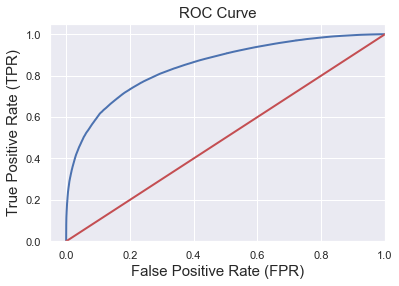

In [27]:
# Initial the model with optimized hyper-parameter
rf_opti = RandomForestClassifier(max_depth=60, max_features=3, min_samples_leaf=9,
                                 min_samples_split=4, n_estimators=600, n_jobs=-1, random_state=42)

# Fit and evaluate the optimized model
rf_roc_auc_tr, rf_roc_auc_te, rf_accu, rf_tpr, rf_fpr = model_fit_evaluate(rf_opti)

### Gradient Boosting

#### Fit and Evaluate Gradient Boosting with Default Hyper-parameters¶

CV ROC-AUC Score(Train): Mean - 0.822022 | Std - 0.001084 | Max - 0.822864 | Min - 0.819912
CV ROC-AUC Score(Test): Mean - 0.822939 | Std - 0.001761 | Max - 0.825529 | Min - 0.820945
True Positive Rate: 0.687
False Positive Rate: 0.191
Mean Accuracy Score: 0.748


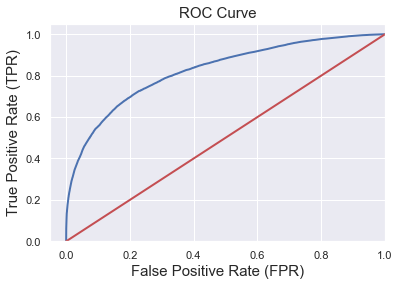

In [29]:
# Initial the model with default hyper-parameters
gb_default = GradientBoostingClassifier(random_state=42)

# Fit and evaluate the defult model 
_ = model_fit_evaluate(gb_default)

#### Gradient Boosting Hyper-parameters Tuning with Random Search

For Gradient Boosting, we will only use Random Search to optimize the hyper-parameters when taking computing time into account.

In [30]:
# Define estimator
gb = GradientBoostingClassifier(random_state=42)

# Define hyper-parameters range
n_estimators = list(range(100, 301, 50))
learning_rate = [0.05, 0.10, 0.15, 0.20] 
max_features = [2, 3]
max_depth = list(range(4, 15, 2))
min_samples_split = list(range(200,1801,200))
min_samples_leaf = list(range(100, 401, 50))

gb_para = {'n_estimators': n_estimators,
           'learning_rate': learning_rate,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}

print('Hyper-parameter Range:\n', gb_para)

# Optimize hyper-parameters with Random Search
# Set the number of iteration as 50, instead of the default 10, to improve the quality
random_search(gb, gb_para, number_of_iter=50, number_of_folds=5)

Hyper-parameter Range:
 {'n_estimators': [100, 150, 200, 250, 300], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'max_features': [2, 3], 'max_depth': [4, 6, 8, 10, 12, 14], 'min_samples_split': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'min_samples_leaf': [100, 150, 200, 250, 300, 350, 400]}
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 800, 'min_samples_leaf': 100, 'max_features': 2, 'max_depth': 14, 'learning_rate': 0.1}
Best roc_auc Score: 0.848
Best Estimator: GradientBoostingClassifier(max_depth=14, max_features=2, min_samples_leaf=100,
                           min_samples_split=800, n_estimators=300,
                           random_state=42)


#### Optimized Gradient Boosting Training and Evaluation

CV ROC-AUC Score(Train): Mean - 0.847796 | Std - 0.001643 | Max - 0.849563 | Min - 0.844688
CV ROC-AUC Score(Test): Mean - 0.843530 | Std - 0.001634 | Max - 0.845485 | Min - 0.840914
True Positive Rate: 0.719
False Positive Rate: 0.183
Mean Accuracy Score: 0.768


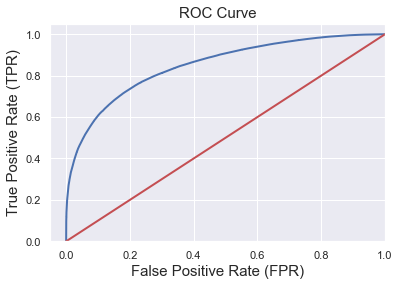

In [31]:
# Initial the model with optimized hyper-parameter
gb_opti = GradientBoostingClassifier(max_depth=14, max_features=2, min_samples_leaf=100,
                           min_samples_split=800, n_estimators=300,
                           random_state=42)

# Fit and evaluate the optimized model
gb_roc_auc_tr, gb_roc_auc_te, gb_accu, gb_tpr, gb_fpr = model_fit_evaluate(gb_opti)

## Comparing Models

### Comparing roc_auc Scores

                 Model  roc_auc_train  roc_auc_test
0  Logistic Regression          0.750         0.751
1                  KNN          0.835         0.828
2        Random Forest          0.846         0.841
3    Gradient Boosting          0.848         0.844


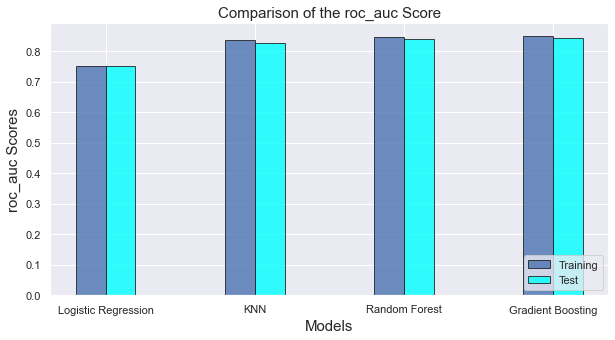

In [33]:
# Built score dataframe
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Gradient Boosting']
roc_auc_tr = [lr_roc_auc_tr, knn_roc_auc_tr, rf_roc_auc_tr, gb_roc_auc_tr] 
roc_auc_te = [lr_roc_auc_te, knn_roc_auc_te, rf_roc_auc_te, gb_roc_auc_te]
columns = ['Model', 'roc_auc_train', 'roc_auc_test']
roc_auc_comp = pd.DataFrame({'Model': models, 
                                   'roc_auc_train': roc_auc_tr, 
                                   'roc_auc_test': roc_auc_te})
print(roc_auc_comp)

# Plot accuracy for comparing
index_tr=[1,2,3,4]
index_te=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel('roc_auc Scores',fontsize=15)
plt.title('Comparison of the roc_auc Score',fontsize=15)
plt.bar(index_tr,roc_auc_tr,color='b',alpha=0.8,label='Training',edgecolor='k',width=0.2)
plt.bar(index_te,roc_auc_te,color='cyan',alpha=0.8,label='Test',edgecolor='k',width=0.2)
plt.legend(loc='lower right')
plt.xticks([1.1, 2.1,3.1,4.1], models)
_ = plt.show()

### Comparing Accuracy, TPR, FPR

                 Model  Accuracy  True Positive Rate  False Positive Rate
0  Logistic Regression     0.682               0.619                0.256
1                  KNN     0.757               0.700                0.185
2        Random Forest     0.767               0.722                0.187
3    Gradient Boosting     0.768               0.719                0.183


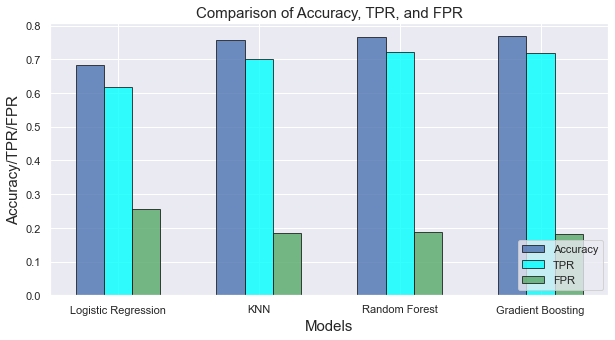

In [34]:
# Build AUROC, true positive rate, and false positive rate dataframe
TPR = [lr_tpr, knn_tpr, rf_tpr, gb_tpr] 
FPR = [lr_fpr, knn_fpr, rf_fpr, gb_fpr] 
Accuracy = [lr_accu, knn_accu, rf_accu, gb_accu]
columns = ['Model', 'Accuracy', 'True Positive Rate', 'False Positive Rate']
accu_tpr_fpr_comp = pd.DataFrame({'Model': models, 
                                        'Accuracy': Accuracy,
                                        'True Positive Rate': TPR, 
                                        'False Positive Rate': FPR
                                        })
print(accu_tpr_fpr_comp)

# Plot AUROC, TPR, FPR for comparing
index_accu=[1,2,3,4]
index_tpr=[1.2,2.2,3.2,4.2]
index_fpr=[1.4,2.4,3.4,4.4]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Accuracy/TPR/FPR',fontsize=15)
plt.title('Comparison of Accuracy, TPR, and FPR',fontsize=15)
plt.bar(index_accu, Accuracy, color='b', alpha=0.8, label='Accuracy',edgecolor='k',width=0.2)
plt.bar(index_tpr, TPR, color='cyan',alpha=0.8, label='TPR', edgecolor='k', width=0.2)
plt.bar(index_fpr, FPR, color='g', alpha=0.8, label='FPR', edgecolor='k', width=0.2)
plt.legend(loc = 'lower right')
plt.xticks([1.2, 2.2, 3.2, 4.2], models)
_ = plt.show()

There are no big difference among KNN, Random Forest, and Gradient Boosting while Gradient Boosting looks a little bit better. Gradient Boost has the highest roc_auc score, accuracy score, decent true positive rate and false positive rate.

We can get more information about this best model.

In [36]:
from sklearn.metrics import classification_report
best_model_gb = GradientBoostingClassifier(max_depth=14, max_features=2, min_samples_leaf=100,
                           min_samples_split=800, n_estimators=300,
                           random_state=42)
best_model_gb.fit(X_train, y_train)
predictions = best_model_gb.predict(X_test)

'              precision    recall  f1-score   support\n\n         0.0       0.75      0.82      0.78     92327\n         1.0       0.80      0.72      0.76     91391\n\n    accuracy                           0.77    183718\n   macro avg       0.77      0.77      0.77    183718\nweighted avg       0.77      0.77      0.77    183718\n'

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78     92327
         1.0       0.80      0.72      0.76     91391

    accuracy                           0.77    183718
   macro avg       0.77      0.77      0.77    183718
weighted avg       0.77      0.77      0.77    183718



## Save Optimized Models

In [35]:
import joblib

filename_lr = 'optimized_model_lr.sav'
filename_knn = 'optimized_model_knn.sav'
filename_rf = 'optimized_model_rf.sav'
filename_gb = 'optimized_model_gb_best.sav'

joblib.dump(lr_opti, filename_lr)
joblib.dump(knn_opti, filename_knn)
joblib.dump(rf_opti, filename_rf)
joblib.dump(gb_opti, filename_gb)

['optimized_model_gb_best.sav']

## Conclusion

1. 6 out of 21 features were chosen as important features based on RFECV feature selection results. 

2. This is a classification problem. Here we used 4 models:

    * Logistic Regression
    * K-Nearest Neighbor (KNN)
    * Random Forest
    * Gradient Boost

3. For every model, we evaluated the roc_auc scores using cross validation, calculated accuracy score, true positive rate, false positive rate, and plot the ROC curve.

4. We used random search and grid search to tune models' hyper-parameters. The roc_auc score showed that tuning with grid search did not improve the model's performance obviously but was very time consuming.

5. We compared the 4 models' performance and found that there's no big difference among KNN, Random Forest, and Gradient Boost. 

6. Gradient Boost was slightly better. The roc_auc score was 0.844, accuracy score is 0.768, true positive rate is 0.719, false positive rate is 0.183.

## Future work

1. We have used totally 4 models in this project. We also can build different models, such as SVM, Naive Bayes, AdaBoost, or try XGBoost, to improve the performance.

2. The target feature, funding speed, was derived from the funded amount and funded days. To ensure balance, here, we set the threshold at 50%, i.e., the half of the loans with lower funding speed was set as 0, and the half of the loans with higher funding speed was set as 1. We can adjust the threshold based on the real world situation. For example, the organization can reduce the threshold to 30% when running with less funding pressure such that 70% of the loans can be considered as fast-funding loans and have the chance to post on the crowd-funding website. What we need to pay attention is that when the threshold is too low or too high,  the dataset will suffer imbalance issue, which need special handle.

3. In this project, we only take the funding speed into account, but for the crowd-fundings that aim to help the poor, there are other important criteria used to set investment priority. One of them is the poverty level of the borrowers. So in the future, we also can build more localized models to estimate the poverty levels of residents in the regions where Kiva has active loans.

4. We can do customer(lender) segmentation and behavioral analytics if more datasets about the lenders are available.